In [16]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import metrics
import seaborn as sn

In [13]:
#Importing data
x_train= pd.read_csv("x_train_py.csv")
#Removing the extra index column
x_train = x_train[x_train.columns.drop('Unnamed: 0')]
#Importing data
x_test = pd.read_csv("x_test_py.csv")
#Removing the extra index column
x_test = x_test[x_test.columns.drop('Unnamed: 0')]
#Importing data
y_train = pd.read_csv("y_train_py.csv")
#Removing the extra index column
y_train = y_train[y_train.columns[1]]
#Importing data
y_test = pd.read_csv("y_test_py.csv")
#Removing the extra index column
y_test= y_test[y_test.columns[1]] 

In [14]:
#Define RBF kernel with length 1
kernel = 1.0 * RBF(1.0)
#Define Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train)
#Testing Gaussian Process Classifier
gpc.score(x_test, y_test)

0.9590643274853801

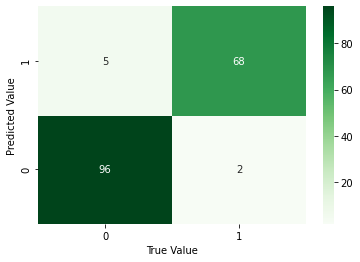

In [27]:
#Defining and plotting confusion matr
confusion_matrix = metrics.confusion_matrix(y_test, gpc.predict(x_test))

s = sn.heatmap(confusion_matrix, annot=True,cmap="Greens")
s.set_xlabel("True Value")
s.set_ylabel("Predicted Value")
s.invert_yaxis()